<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

pd.set_option('display.max_columns', None) # сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы

Откроем датасеты

In [2]:
try:
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    train = pd.read_csv('gold_recovery_train_new.csv')
    test = pd.read_csv('gold_recovery_test_new.csv')
    full = pd.read_csv('gold_recovery_full_new.csv')

Выведем информацию по датасетам

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
display(train.head())
display(test.head())
display(full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Теперь посмотрим на кол-во пропусков

In [7]:
print('Колличество пропусков в тестовой выборке:', test.isnull().sum().sum())
print('Колличество пропусков в обучающей выборке:', train.isnull().sum().sum())
print('Колличество пропусков в полной выборке:', full.isnull().sum().sum())

Колличество пропусков в тестовой выборке: 90
Колличество пропусков в обучающей выборке: 4100
Колличество пропусков в полной выборке: 4481


Приведем дату в колонках date к формату datetime во всех 3х датасетах

In [8]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [9]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test.dtypes

date                                          datetime64[ns]
primary_cleaner.input.sulfate                        float64
primary_cleaner.input.depressant                     float64
primary_cleaner.input.feed_size                      float64
primary_cleaner.input.xanthate                       float64
primary_cleaner.state.floatbank8_a_air               float64
primary_cleaner.state.floatbank8_a_level             float64
primary_cleaner.state.floatbank8_b_air               float64
primary_cleaner.state.floatbank8_b_level             float64
primary_cleaner.state.floatbank8_c_air               float64
primary_cleaner.state.floatbank8_c_level             float64
primary_cleaner.state.floatbank8_d_air               float64
primary_cleaner.state.floatbank8_d_level             float64
rougher.input.feed_ag                                float64
rougher.input.feed_pb                                float64
rougher.input.feed_rate                              float64
rougher.input.feed_size 

In [10]:
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')
full.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

Теперь заменим пропуски. Решил выбрать метод interpolate с параметром polynomial. Она наиболее плавная и дает наименьшее отклонение.

In [11]:
train = train.interpolate(method='polynomial', order=2)
test = test.interpolate(method='polynomial', order=2)

Проверяем, остались ли пропуски.

In [12]:
print('Колличество пропусков в тестовой выборке:', test.isnull().sum().sum())
print('Колличество пропусков в обучающей выборке:', train.isnull().sum().sum())

Колличество пропусков в тестовой выборке: 0
Колличество пропусков в обучающей выборке: 0


In [13]:
# проверяем, есть ли в данных дубликаты
train.duplicated().sum()

0

In [14]:
# проверяем, есть ли в данных дубликаты
test.duplicated().sum()

0

In [15]:
# проверяем, есть ли в данных дубликаты
full.duplicated().sum()

0

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Далее найдем MAE между расчётами и значением признака. 

In [16]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

train.dropna(subset = ['rougher.output.recovery'], inplace = True) #избавимся от пропусков в столбце rougher.output.recovery

recovery = (C * (F - T)) / (F * (C - T)) * 100
old_recovery = train['rougher.output.recovery']

mae = mean_absolute_error(old_recovery, recovery)
print('MAE=', mae)

MAE= 9.73512347450521e-15


Среднее абсолютное отклонение мало. Различий между данными нет, можно смело считать, что рассчеты верны.

Проанализируем признаки, отсутствующие в тестовой выборке

In [17]:
print(train.shape)
print(test.shape)

(14149, 87)
(5290, 53)


In [18]:
train.shape[1] - test.shape[1]

34

Посмотрим, каких колонок не хватает в тестовом датафрейме.

In [19]:
missing_columns = set(train.columns) - set(test.columns)
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Мы видим, что в тестовой выборке отсутствуют данные по всем этапы получения золотой руды:
- флотация:
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au'
- первичная очистка:
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate'
- вторичная очистка:
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol',
       'secondary_cleaner.output.tail_au']
- финальные характеристики:
       'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au'
Тип данных float64

В тестовой выборке всего 53 признака, два из них - целевые. Исходя из условия задачи, это rougher.output.recovery и final.output.recovery. Они будут нужны для расчета метрики качества. Добавим их в тестовую выборку, используя метод merge, в качестве индексов используем колонку date. В условии сказано, что данные индексируются датой и временем получения информации.

In [20]:
test = test.merge(full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

Думаю, что теперь можно удалить колонку date, т.к. она никакой роли не сыграет в дальнейшем обучении модели.

In [21]:
train = train.drop('date', axis=1)
test = test.drop('date', axis=1)

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [22]:
#создадим датасет с данными для золота
df_au = (full[[
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au']].copy())

In [23]:
#создадим датасет с данными для серебра
df_ag = (full[[
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag']].copy())

In [24]:
#создадим датасет с данными для свинца
df_pb = (full[[
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb']].copy())

In [25]:
#теперь напишем функцию, которая будет рисовать данные всех четырех стадий на одном графике
def draw (data, title):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.set_ylabel('Количество наблюдений')
    ax.set_xlabel('Концентрация металла')
    ax.set_title(title)
    for col in data:
        data[col].hist(alpha=.5) 
        ax.legend(['Исходное сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

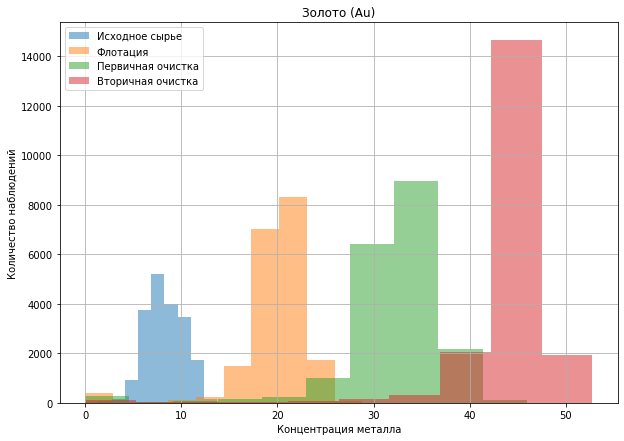

In [26]:
draw(df_au, 'Золото (Au)')

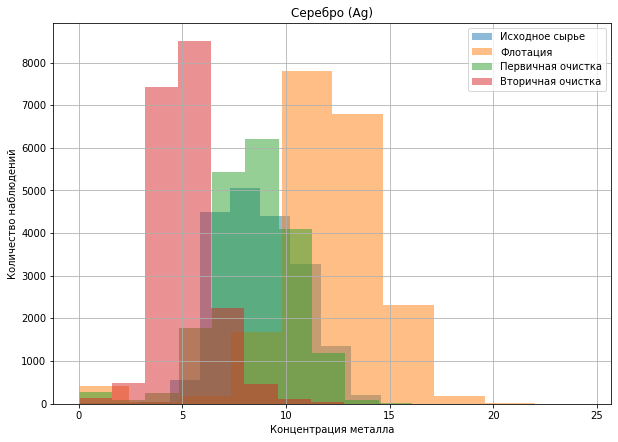

In [27]:
draw(df_ag, 'Серебро (Ag)')

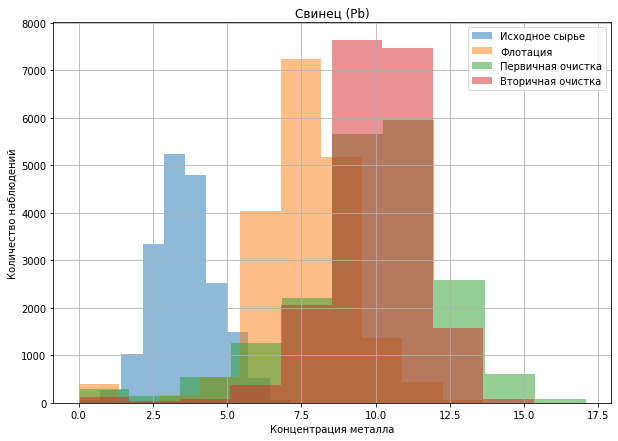

In [28]:
draw(df_pb, 'Свинец (Pb)')

Как видно из графиков, после флотации увеличивается кол-во содержания золота, серебра и свинца, после первичной очистки увеличивается кол-во золота, а кол-во серебра и свинца уменьшается, а после вторичной очистки также наблюдается увеличение кол-ва золота, серебра и свинца

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Судя по полученной ранее информации, у нас есть два признака с параметром feed_size, это rougher.input.feed_size и primary_cleaner.input.feed_size.

Сначала для признака rougher.input.feed_size

Text(0, 0.5, 'соотношение')

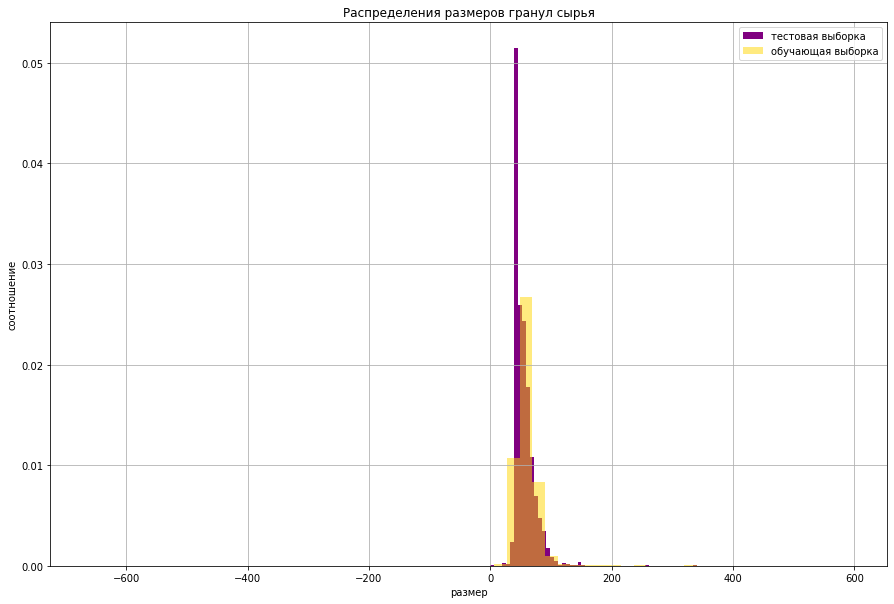

In [29]:
test['rougher.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=1, density=True, color = "purple")
train['rougher.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=0.5, density=True, color = "gold")
plt.legend(['тестовая выборка', 'обучающая выборка'])
plt.title('Распределения размеров гранул сырья')
plt.xlabel('размер')
plt.ylabel('соотношение')

Теперь для признака 'primary_cleaner.input.feed_size'

Text(0, 0.5, 'соотношение')

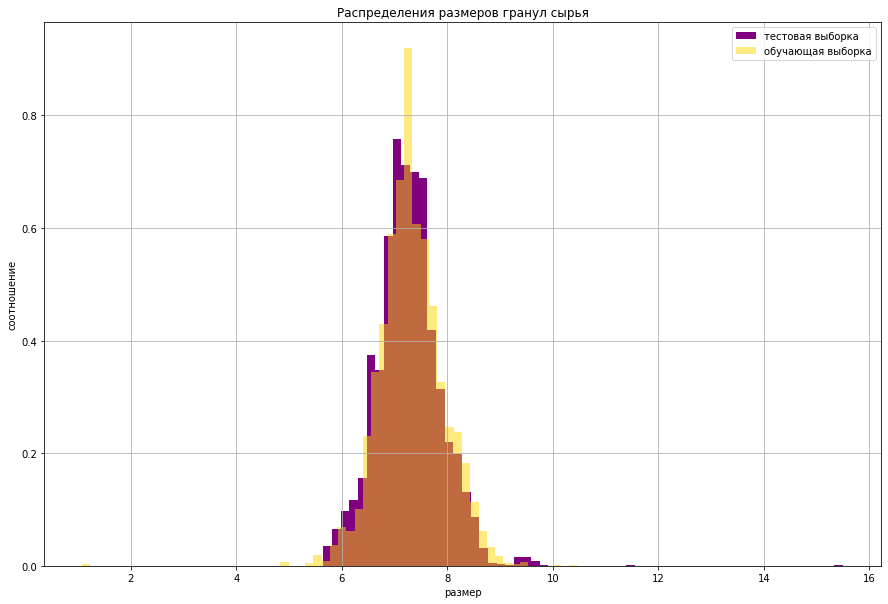

In [30]:
test['primary_cleaner.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=1, density=True, color = "purple")
train['primary_cleaner.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=0.5, density=True, color = "gold")
plt.legend(['тестовая выборка', 'обучающая выборка'])
plt.title('Распределения размеров гранул сырья')
plt.xlabel('размер')
plt.ylabel('соотношение')

Распределения не сильно отличаются друг от друга, значит оценка модели будет правильной.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [31]:
#создадим датасет для сырья
feed_concentrate = full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] +\
            full['rougher.input.feed_sol'] + full['rougher.input.feed_au']
#создадим датасет для чернового концентрата
rougher_concentrate = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] +\
            full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']
#создадим датасет для финального концентрата
final_concentrate = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] +\
            full['final.output.concentrate_sol'] + full['final.output.concentrate_au']

Text(0, 0.5, 'Соотношение')

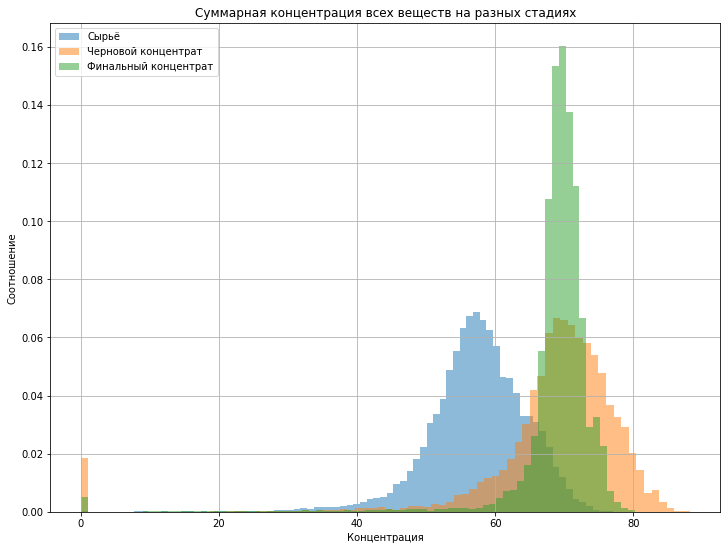

In [32]:
feed_concentrate.hist(figsize=(12, 9), bins=80, alpha=.5, density=True)
rougher_concentrate.hist(figsize=(12, 9), bins=80, alpha=0.5, density=True)
final_concentrate.hist(figsize=(12, 9), bins=80, alpha=0.5, density=True)
plt.legend(['Сырьё', 'Черновой концентрат', 'Финальный концентрат'])
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('Концентрация')
plt.ylabel('Соотношение')

Мы видим, что аномальные значения где-то возле нуля. Удалим все, которые меньше или равны нулю, чтобы не мешали построению более точной модели.

In [33]:
full = full.query('@feed_concentrate >0 & @rougher_concentrate > 0 & @final_concentrate > 0')

In [34]:
train = train.query('@feed_concentrate >0 & @rougher_concentrate > 0 & @final_concentrate > 0')

Проверим, что получилось

In [35]:
#создадим датасет для сырья после удаления значений
feed_concentrate_2 = full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] +\
            full['rougher.input.feed_sol'] + full['rougher.input.feed_au']
#создадим датасет для чернового концентрата после удаления значений
rougher_concentrate_2 = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] +\
            full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']
#создадим датасет для финального концентрата после удаления значений
final_concentrate_2 = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] +\
            full['final.output.concentrate_sol'] + full['final.output.concentrate_au']

Text(0, 0.5, 'Соотношение')

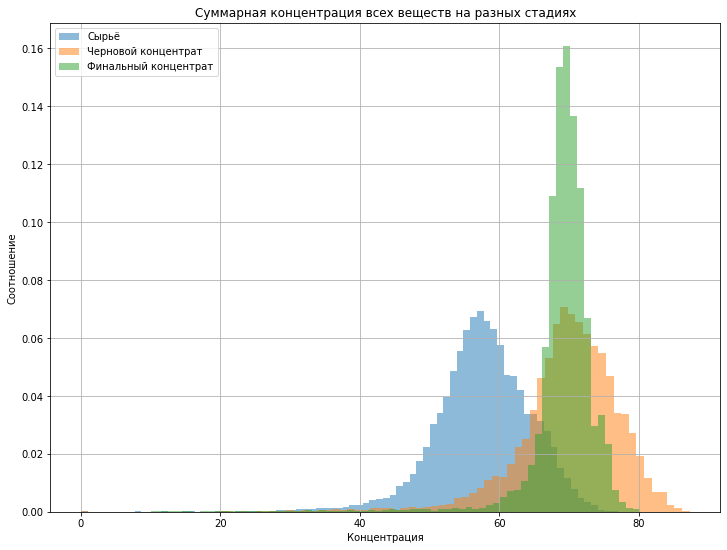

In [36]:
feed_concentrate_2.hist(figsize=(12, 9), bins=80, alpha=.5, density=True)
rougher_concentrate_2.hist(figsize=(12, 9), bins=80, alpha=0.5, density=True)
final_concentrate_2.hist(figsize=(12, 9), bins=80, alpha=0.5, density=True)
plt.legend(['Сырьё', 'Черновой концентрат', 'Финальный концентрат'])
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('Концентрация')
plt.ylabel('Соотношение')

Видимых на графике аномалий больше нет.

Вывод:
Проанализировали изменения концентрации металлов на разных этапах: как видно из графиков, на всех этапах (флотация, первичная и вторичная очистка) увеличивается кол-во содержания золота. Так же при флотации увеличивается кол-во серебра и свинца. После первичной очистки, кол-во серебра и свинца уменьшается. После вторичной очистки наблюдается увеличение серебра и свинца. Проанализировали распределения размеров гранул на обучающей и тестовой выборке: они распределяются с незначительными отличиями, что не влияет на оценку модели.
Проанализировали суммарную концентрацию всех веществ на разных стадиях. Были обнаружены аномалии. Убрали найденные аномалии.

## Модель

Думаю, что из тренировочной выборки нужно удалить отсутствующие в тестовой выборке признаки (за исключением целевых признаков). Ранее мы сохранили эти признаки в переменную missing_columns. Иначе, в ходе обучения моделей может произойти утечка целевого признака. Она происходит, когда в признаки попадает информация о целевом признаке.

In [37]:
signs_for_delete = missing_columns - set(['rougher.output.recovery','final.output.recovery'])

In [38]:
#удаляем из трейна столбцы с признаками, которых нет в тесте
train = train.drop(columns=signs_for_delete, axis = 1)

Подготовим features и target для обучающей выборки

In [39]:
# делим выборки на features и target
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = train['rougher.output.recovery']#.reset_index(drop=True)
target_train_final = train['final.output.recovery']#.reset_index(drop=True)

Проверим, нет ли пропусков

In [40]:
display('В features_train пропусков - {0}'.format(features_train.isna().sum().sum())) 
display('В target_train_rougher пропусков - {0}'.format(target_train_rougher.isna().sum().sum())) 
display('В target_final пропусков - {0}'.format(target_train_final.isna().sum().sum()))

'В features_train пропусков - 0'

'В target_train_rougher пропусков - 0'

'В target_final пропусков - 0'

Теперь апишем функцию для рассчета метрики качества модели - sMAPE

In [41]:
def smape(target, predict):
    smape = 2.0 * np.mean(np.abs(target - predict) / (np.abs(target) + np.abs(predict))) * 100
    return smape

Напишем функцию для рассчета итогового sMAPE

In [42]:
smape_score = make_scorer(smape, greater_is_better=False)

In [43]:
def smape_final (rougher, final):
    smape_final = 0.25 * rougher + 0.75 * final
    return smape_final

Теперь укажем модели, на которых будем провеодить обучение. Это линейная регрессия, случайный лес и дерево решений.

In [44]:
model_lnr = LinearRegression()
model_rfr = RandomForestRegressor(bootstrap=True, random_state=12345)
model_dtr = DecisionTreeRegressor(random_state=12345)

Напишем параметры в GridSearch для случайного леса и дерева решений

In [45]:
params_rfr = {'n_estimators': range(1,20),
              'max_depth': range(1,10),
              }
params_dtr = {'max_depth' : range(1,10),
              }

Теперь напишем кросс-валидацию для лин.регрессии и гридсёрч для леса и дерева

In [46]:
cv_rougher_lnr = cross_val_score(model_lnr, features_train, target_train_rougher, cv = 4, scoring = smape_score)
cv_final_lnr = cross_val_score(model_lnr, features_train, target_train_final, cv = 4, scoring = smape_score)
grid_rougher_rfr = GridSearchCV(model_rfr,param_grid = params_rfr, cv = 3, verbose = 0, n_jobs = -1, scoring = smape_score)
grid_final_rfr = GridSearchCV(model_rfr, param_grid = params_rfr, cv = 3, verbose = 0, n_jobs = -1, scoring = smape_score)
grid_rougher_dtr = GridSearchCV(model_dtr,param_grid = params_dtr, cv = 3, verbose = 0, n_jobs = -1, scoring = smape_score)
grid_final_dtr = GridSearchCV(model_dtr,param_grid = params_dtr, cv = 3, verbose = 0, n_jobs = -1, scoring = smape_score)

Обучаем модель

In [47]:
%%time
grid_rougher_rfr.fit(features_train, target_train_rougher)
grid_final_rfr.fit(features_train,target_train_final)
grid_rougher_dtr.fit(features_train, target_train_rougher)
grid_final_dtr.fit(features_train,target_train_final)

CPU times: user 19min 37s, sys: 2.28 s, total: 19min 40s
Wall time: 19min 41s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': range(1, 10)},
             scoring=make_scorer(smape, greater_is_better=False))

Выведем результаты

In [48]:
print("Лучшие модели")
print(grid_rougher_rfr.best_estimator_)
print(grid_final_rfr.best_estimator_)
print(grid_rougher_dtr.best_estimator_)
print(grid_final_dtr.best_estimator_)

Лучшие модели
RandomForestRegressor(max_depth=5, n_estimators=5, random_state=12345)
RandomForestRegressor(max_depth=2, n_estimators=19, random_state=12345)
DecisionTreeRegressor(max_depth=5, random_state=12345)
DecisionTreeRegressor(max_depth=2, random_state=12345)


Посчитаем sMAPE

In [49]:
best_result_rougher_lnr = sum(cv_rougher_lnr)/len(cv_rougher_lnr)
best_result_final_lnr = sum(cv_final_lnr)/len(cv_final_lnr)
best_score_rougher_rfr = grid_rougher_rfr.best_score_
best_score_final_rfr = grid_final_rfr.best_score_
best_score_rougher_dtr = grid_rougher_dtr.best_score_
best_score_final_dtr = grid_final_dtr.best_score_

Выведем результаты

In [50]:
# Определяем лучшую модель для каждого целевого признака
print("rougher")
print("LinearRegression", best_result_rougher_lnr*-1, "RandomForest",best_score_rougher_rfr*-1,"DecisionTree",best_score_rougher_dtr*-1)
print("final")
print("LinearRegression", best_result_final_lnr*-1, "RandomForest",best_score_final_rfr*-1,"DecisionTree",best_score_final_dtr*-1)

rougher
LinearRegression 13.340930891467746 RandomForest 11.07018049881828 DecisionTree 11.575203759163726
final
LinearRegression 12.717560861265532 RandomForest 10.471436453959369 DecisionTree 10.749297586009382


Как мы видим, лучше себя показала модель "случайный лес"

Теперь посчитаем финальные sMAPE для каждый модели

Финальный sMAPE для LinearRegression

In [51]:
smape_final(best_result_rougher_lnr,best_result_final_lnr)*-1

12.873403368816085

Финальный sMAPE для RandomForest

In [52]:
smape_final(best_score_rougher_rfr,best_score_final_rfr)*-1

10.621122465174096

Финальный sMAPE для DecisionTree

In [53]:
smape_final(best_score_rougher_dtr,best_score_final_dtr)*-1

10.955774129297968

Как мы видим, лучше всего себя показала модель "случайный лес". Теперь проверим ее на тестовой выборке.

In [54]:
# делим выборки на features и target
features_test = test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_rougher = test['rougher.output.recovery']
target_test_final = test['final.output.recovery']

Модель "случайный лес" с параметрами, которые показали себя лучше. Проверим ее качество.

In [55]:
model_rfr_test_rougher = RandomForestRegressor(max_depth=5, n_estimators=5, random_state=12345)
model_rfr_test_rougher.fit(features_train, target_train_rougher)
predict_rougher = model_rfr_test_rougher.predict(features_test)
smape_rfr_rougher = smape(target_test_rougher, predict_rougher)

model_rfr_test_final = RandomForestRegressor(max_depth=2, n_estimators=19, random_state=12345)
model_rfr_test_final.fit(features_train, target_train_final)
predict_final = model_rfr_test_final.predict(features_test)
smape_rfr_final = smape(target_test_final, predict_final)

print('Итоговое sMAPE:', smape_final(smape_rfr_rougher, smape_rfr_final))

Итоговое sMAPE: 9.554985721990953


Проверим качество модели. Для этого используем DummyRegressor.

In [56]:
dummy_1 = DummyRegressor(strategy="mean")
dummy_2 = DummyRegressor(strategy="mean")

dummy_rougher = dummy_1.fit(features_train,target_train_rougher)
dummy_rougher_pred = dummy_1.predict(features_test)

dummy_final = dummy_2.fit(features_train,target_train_final)
dummy_final_pred = dummy_2.predict(features_test)

smape_dummy_rougher = smape(target_test_rougher, dummy_rougher_pred)
smape_dummy_final = smape(target_test_final, dummy_final_pred)

smape_final(smape_dummy_rougher, smape_dummy_final)

10.142948693565824

Обученная модель показывает более точный результат, чем константная. Значит построенная модель адекватна.

### Вывод: 
В результате анализа датасетов, были замечены пропуски, которые заменили на соседние значения. Так же было выявлено, что в тестовом датасете меньше всего информации, в т.ч. отсутствовали целевые признаки, которые в дальнейшем были добавлены. 
Убедились, что эффективность обогащения рассчитана правильно. Для этого посчитали по формуле МАЕ.
Для дальнейшего анализа были построены графики, наглядно удалось убедиться, что количество содержания золота увеличивается на всех этапах (флотация, первичная и вторичная очистка). Так же при флотации увеличивается кол-во серебра и свинца. После первичной очистки, кол-во серебра и свинца уменьшается. А после вторичной очистки наблюдается увеличение серебра и свинца. 
Проанализировали распределения размеров гранул на обучающей и тестовой выборке: они распределяются с незначительными отличиями, что не влияет на оценку модели. Проанализировали суммарную концентрацию всех веществ на разных стадиях. Были обнаружены аномалии. Убрали найденные аномалии.
Далее были подготовлены данные для обучения моделей. Написана функция по посчету sMAPE. В результате обучения 3х моделей (Линейная регрессия, Случайный лес и Дерево решений) выбрали лучшую модель - Случайный лес.Проверили эту модель на тестовой выборке и сравнили с константной моделью. Убедились, что обученная модель показала более точный результат.